# Grid Cell Phase Coding 

The second cell will load the trial data. There are some parameters that can be changed - which **dataset** (1-8) and analysis **type** (spatial/temporal). 

Once the "trial" is initialized, "phase_analysis()" can be run on it to return the correlation value. There are then a number of graph functions that can be run: XY_plot(), phase_plot(), phase_map_plot(), trajectory_plot(), prediction_plot() and corr_plot(). 

Once the parameters in the second cell are set, the whole notebook can be ran via "Cell" -> "Run All"

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#Some display options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sub_bulk_analysis_mpm
import pycircstat
import os
import glob
import numpy as np

dir = 'alldata/'

In [3]:
t_angles = []
rls = []
rcs = []

for trial in os.listdir(dir+'/XYspkT'):
    for channel in range(1,6):
        
        #XYspkT
        xy_names = glob.glob('alldata/XYspkT/'+trial+'/CH'+str(channel)+'*')
        xy_arrs = [np.loadtxt(f, delimiter=',') for f in xy_names]
        XYspkT = np.concatenate(xy_arrs)
        
        #Phase
        phase_names = glob.glob('alldata/phase/'+trial+'/CH'+str(channel)+'*')
        phase_arrs = [np.loadtxt(f, delimiter=',') for f in phase_names]
        phase = np.concatenate(phase_arrs)
        
        #spkT
        spkT_names = glob.glob('alldata/spkT/'+trial+'/CH'+str(channel)+'*')
        spkT_arrs = [np.loadtxt(f, delimiter=',') for f in spkT_names]
        spkT = np.concatenate(spkT_arrs)
        
        run = sub_bulk_analysis_mpm.gridCells(XYspkT, phase, spkT, 'temporal', control=False)
        run.phase_analysis()
        t_angles.append(run.angles)
        rls.append(run.rl)
        rcs.append(run.rc)
    

/home/harrison/.local/lib/python3.7/site-packages/pycircstat/descriptive.py:340: RuntimeWarning: invalid value encountered in cdouble_scalars
  np.sum(w, axis=axis))
/home/harrison/code/grid-cell/sub_bulk_analysis_mpm.py:45: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  np_dfp = np.pad(phase_df.as_matrix(), 1, 'constant', constant_values=np.nan)


In [4]:
f_angles = []
frls = []
frcs = []

for trial in os.listdir(dir+'/XYspkT'):
    for channel in range(1,6):
        
        #XYspkT
        xy_names = glob.glob('alldata/XYspkT/'+trial+'/CH'+str(channel)+'*')
        xy_arrs = [np.loadtxt(f, delimiter=',') for f in xy_names]
        XYspkT = np.concatenate(xy_arrs)
        
        #Phase
        phase_names = glob.glob('alldata/phase/'+trial+'/CH'+str(channel)+'*')
        phase_arrs = [np.loadtxt(f, delimiter=',') for f in phase_names]
        phase = np.concatenate(phase_arrs)
        
        #spkT
        spkT_names = glob.glob('alldata/spkT/'+trial+'/CH'+str(channel)+'*')
        spkT_arrs = [np.loadtxt(f, delimiter=',') for f in spkT_names]
        spkT = np.concatenate(spkT_arrs)
        
        run = sub_bulk_analysis_mpm.gridCells(XYspkT, phase, spkT, 'temporal', control=True)
        run.phase_analysis()
        f_angles.append(run.angles)
        frls.append(run.rl)
        frcs.append(run.rc)
    

In [5]:
tangles = np.asarray([item for sublist in t_angles for item in sublist])
fangles = np.asarray([item for sublist in f_angles for item in sublist])


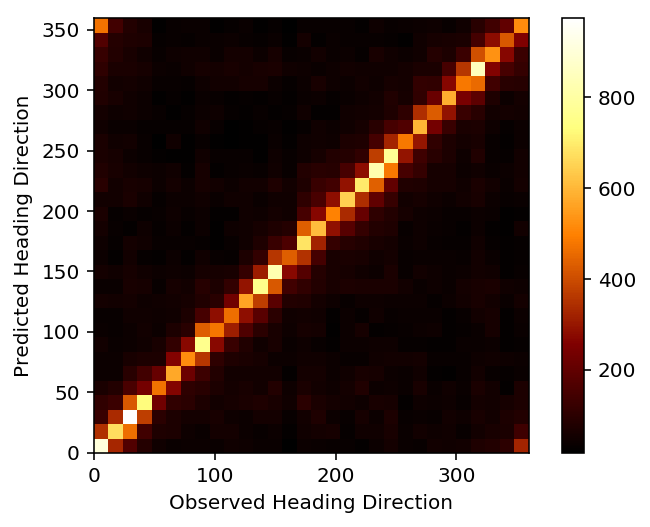

In [6]:
heatmap, xedges, yedges = np.histogram2d(tangles[:, 0], tangles[:, 1], bins=30)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='afmhot')
plt.colorbar()
plt.ylabel('Predicted Heading Direction')
plt.xlabel('Observed Heading Direction')
plt.show()

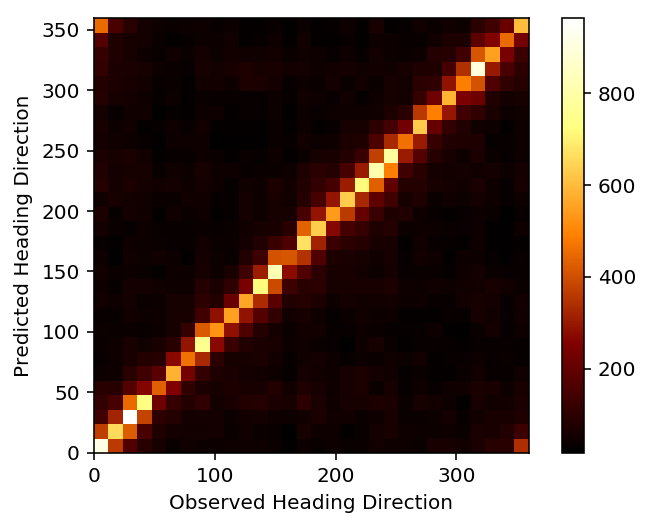

In [7]:
heatmap2, xedges, yedges = np.histogram2d(fangles[:, 0], fangles[:, 1], bins=30)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap2.T, extent=extent, origin='lower', cmap='afmhot')
plt.colorbar()
plt.ylabel('Predicted Heading Direction')
plt.xlabel('Observed Heading Direction')
plt.show()

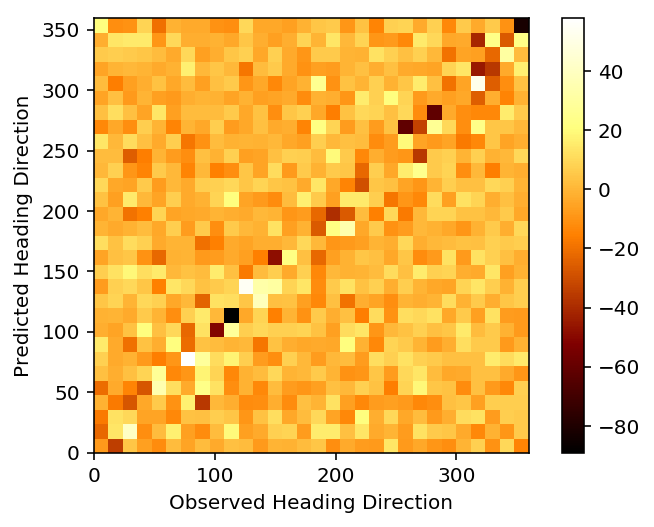

In [8]:
heatmap3, xedges, yedges = np.histogram2d(fangles[:, 0], fangles[:, 1], bins=30)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
diff = heatmap - heatmap2

plt.clf()
plt.imshow(diff.T, extent=extent, origin='lower', cmap='afmhot')
plt.colorbar()
plt.ylabel('Predicted Heading Direction')
plt.xlabel('Observed Heading Direction')
plt.show()

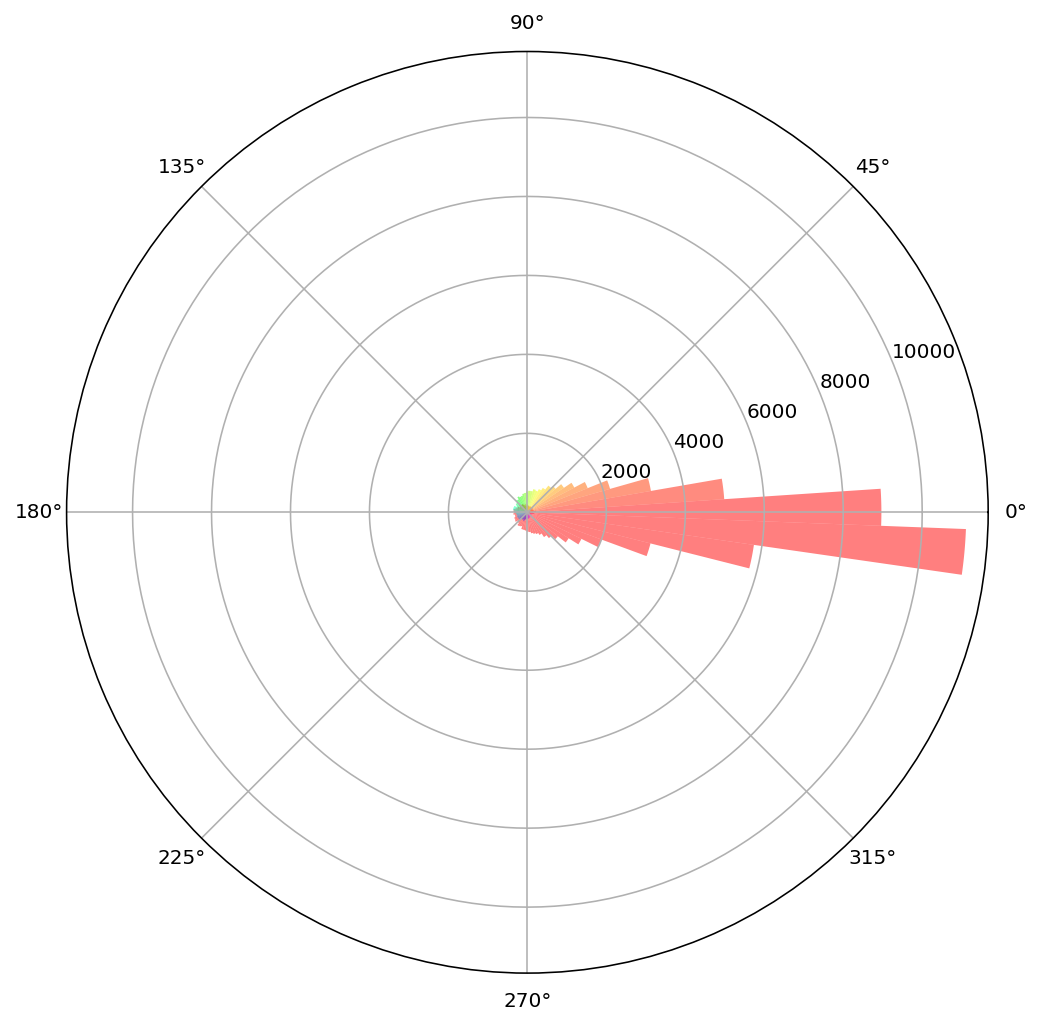

In [24]:
diff = np.sort(tangles[:,0]-tangles[:,1])

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
theta = np.radians(np.arange(diff.min(),diff.max()+6,6))

inds = [np.where(diff<i)[0][-1] for i in np.arange(diff.min()+6,diff.max()+6,6)] #vectorize operation?
b = np.split(diff,inds)
radii = np.array([i.size for i in b])

width = np.radians(360/60)
bars = ax.bar(theta, radii, width=width, bottom=0.0)
for theta, bar in zip(theta, bars):
    bar.set_facecolor(plt.cm.hsv(theta/6.28))
    bar.set_alpha(0.5)

plt.show()

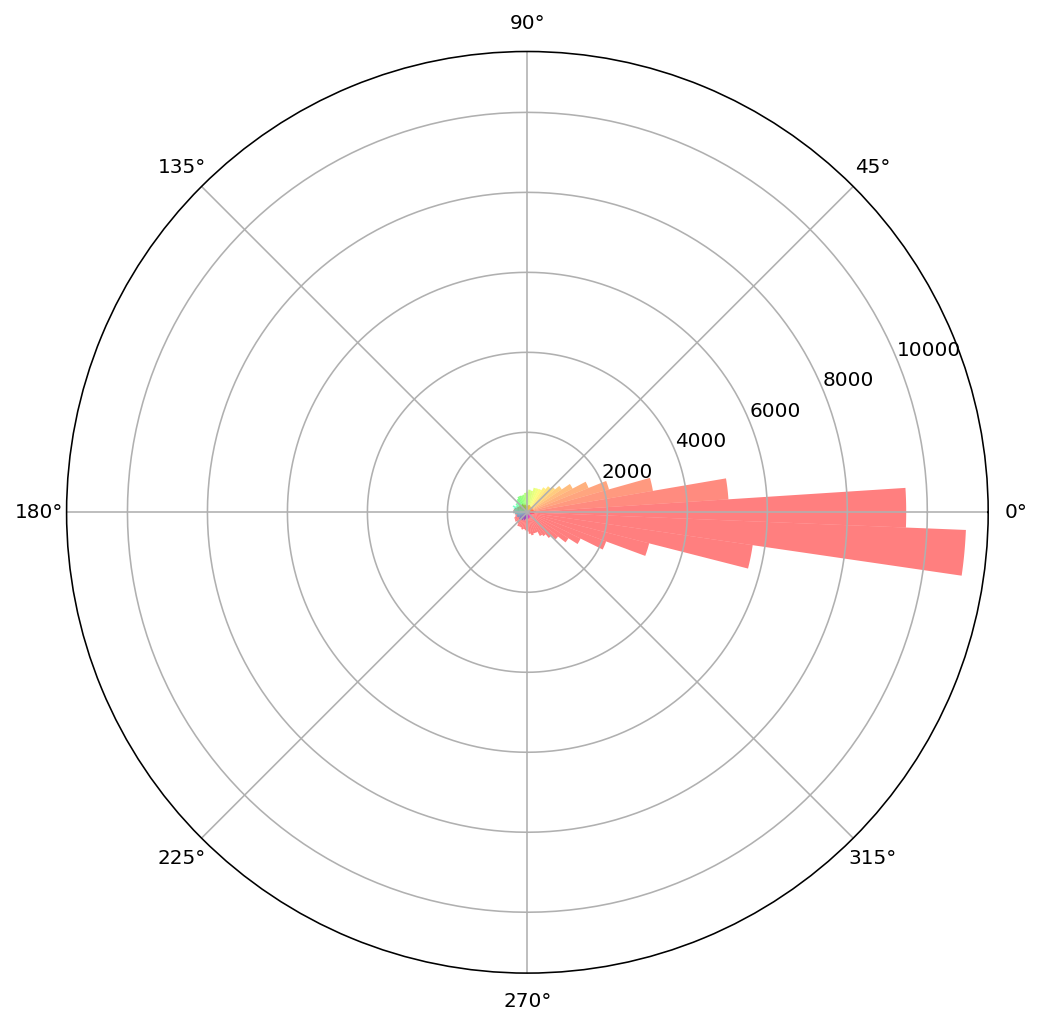

In [25]:
diff = np.sort(fangles[:,0]-fangles[:,1])

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
theta = np.radians(np.arange(diff.min(),diff.max()+6,6))

inds = [np.where(diff<i)[0][-1] for i in np.arange(diff.min()+6,diff.max()+6,6)] #vectorize operation?
b = np.split(diff,inds)
radii = np.array([i.size for i in b])

width = np.radians(360/60)
bars = ax.bar(theta, radii, width=width, bottom=0.0)
for theta, bar in zip(theta, bars):
    bar.set_facecolor(plt.cm.hsv(theta/6.28))
    bar.set_alpha(0.5)

plt.show()

Text(0.5, 0, 'Circular r')

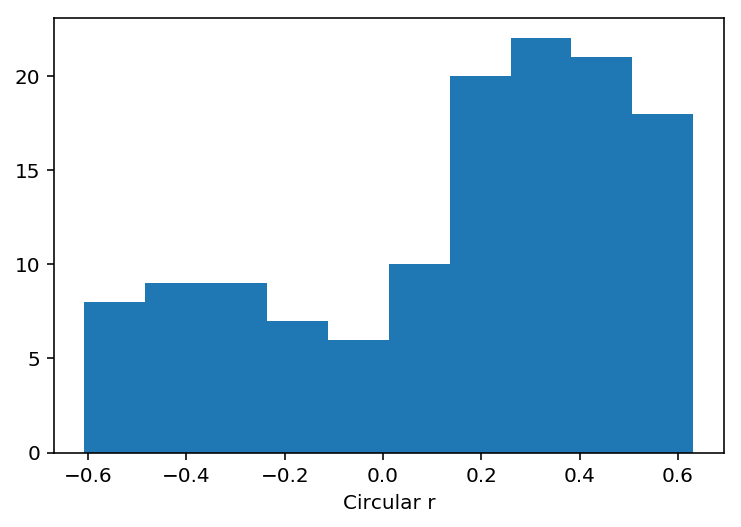

In [16]:
plt.hist(rcs, histtype='stepfilled')
plt.xlabel('Circular r')

Text(0.5, 0, 'Linear r')

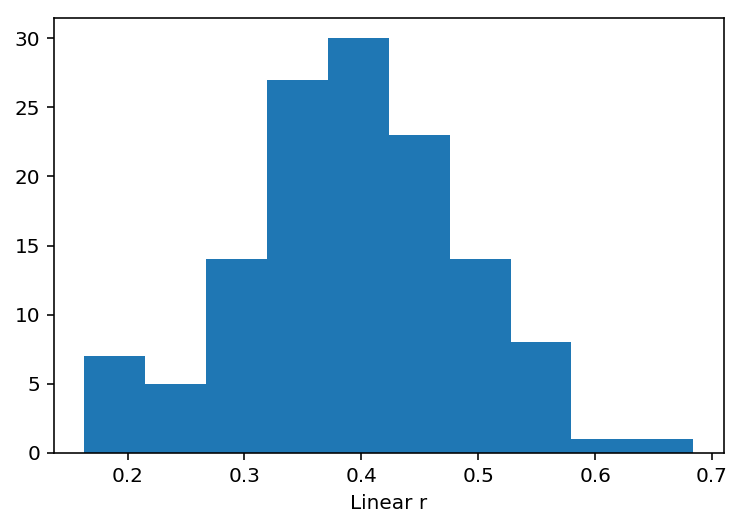

In [17]:
plt.hist(rls)
plt.xlabel('Linear r')

(array([ 6., 11., 15.,  6.,  9.,  8., 13., 16., 25., 21.]),
 array([-0.59717051, -0.47326997, -0.34936943, -0.22546888, -0.10156834,
         0.0223322 ,  0.14623274,  0.27013328,  0.39403383,  0.51793437,
         0.64183491]),
 <a list of 10 Patch objects>)

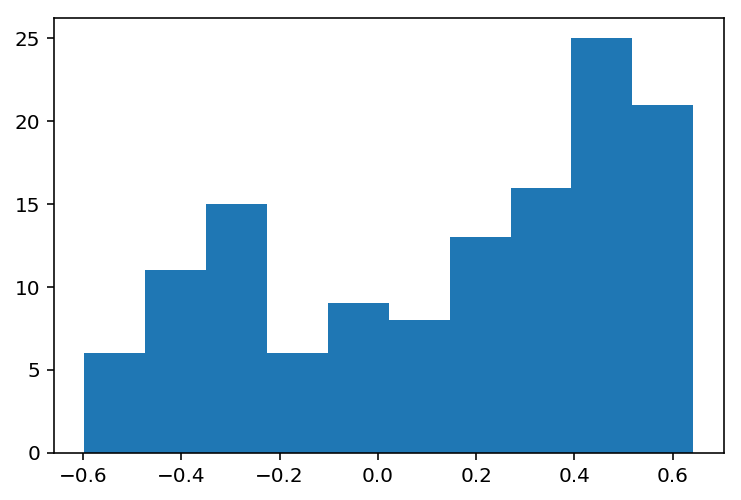

In [23]:
plt.hist(frcs)

In [10]:
tdiff = np.radians(tangles[:,0]-tangles[:,1])
fdiff = np.radians(fangles[:,0]-fangles[:,1])

In [11]:
astropy.stats.kuiper_two(tdiff,fdiff)

(0.00630570035311921, 0.40817690718243)

(array([  944.,   874.,  1023.,  1266.,  1791.,  1913.,  2211.,  2698.,
         4203., 22928., 25840.,  4784.,  3068.,  2383.,  1935.,  1684.,
         1286.,   947.,   755.,   735.]),
 array([-6.28061819, -5.65340729, -5.02619639, -4.39898549, -3.77177459,
        -3.1445637 , -2.5173528 , -1.8901419 , -1.262931  , -0.6357201 ,
        -0.00850921,  0.61870169,  1.24591259,  1.87312349,  2.50033439,
         3.12754528,  3.75475618,  4.38196708,  5.00917798,  5.63638888,
         6.26359977]),
 <a list of 20 Patch objects>)

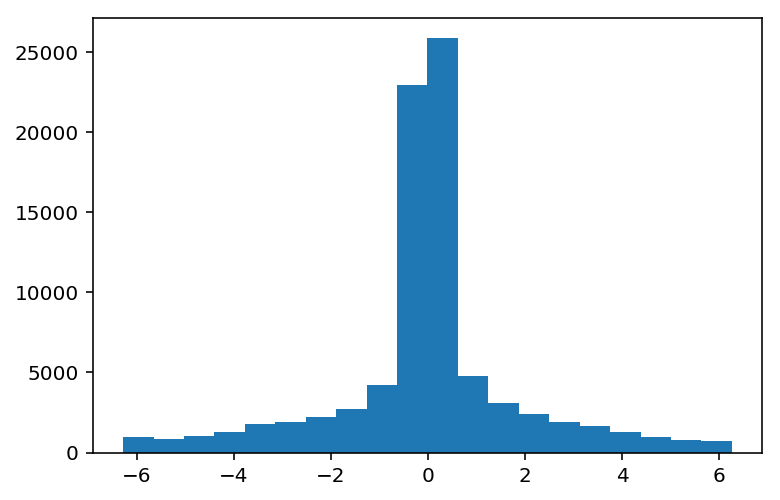

In [28]:
plt.hist(tdiff, bins=20)

(array([  992.,   914.,  1016.,  1257.,  1720.,  1952.,  2254.,  2870.,
         4133., 24737., 24123.,  4634.,  3092.,  2339.,  1981.,  1561.,
         1222.,   978.,   780.,   713.]),
 array([-6.26648914e+00, -5.63941727e+00, -5.01234539e+00, -4.38527351e+00,
        -3.75820164e+00, -3.13112976e+00, -2.50405789e+00, -1.87698601e+00,
        -1.24991414e+00, -6.22842259e-01,  4.22961678e-03,  6.31301493e-01,
         1.25837337e+00,  1.88544524e+00,  2.51251712e+00,  3.13958900e+00,
         3.76666087e+00,  4.39373275e+00,  5.02080462e+00,  5.64787650e+00,
         6.27494838e+00]),
 <a list of 20 Patch objects>)

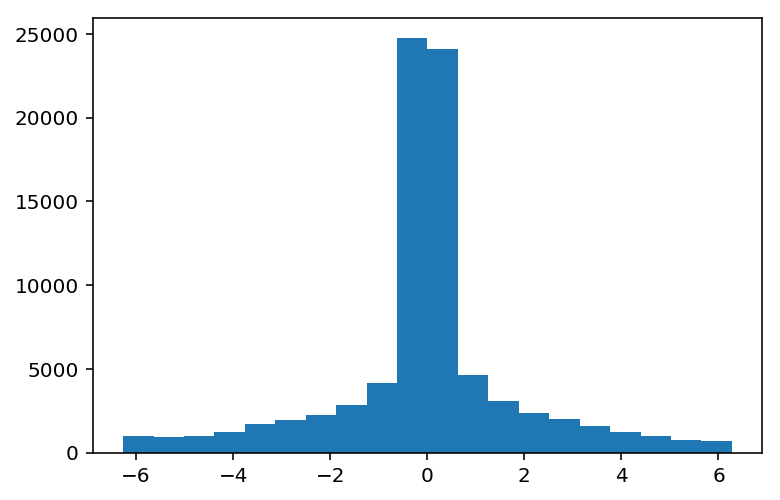

In [29]:
plt.hist(fdiff,bins=20)

In [9]:
import astropy

In [ ]:
astropy.stats.kuiper_two(tdiff,fdiff)